In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import scipy.stats as stats
import statistics


pd.set_option('display.max_rows', 300)

In [2]:
#import the data sets
gsdb_unclean=pd.read_csv("C:\\Users\\carol\\Desktop\\School\\Ryerson\\Final Project CIND 820\\datasets\\GSDB_V2.csv")
hum_rights_unclean=pd.read_csv("C:\\Users\\carol\\Desktop\\School\\Ryerson\\Final Project CIND 820\\datasets\\human rights violations2.csv")
corruption=pd.read_csv("C:\\Users\\carol\\Desktop\\School\\Ryerson\\Final Project CIND 820\\datasets\\corruption.csv")
QOLI=pd.read_csv("C:\\Users\\carol\\Desktop\\School\\Ryerson\\Final Project CIND 820\\datasets\\physical-quality-of-life-index-scale-0-100-1980–2010.csv")

In [3]:
#GSDB DATABASE

In [4]:
#First look at the GSDB data - first we print the first five rows and column names to understand what is being presented.
gsdb_unclean.head(100)

,case_id,sanctioned_state,sanctioning_state,begin,end,trade,descr_trade,arms,military,financial,travel,other,objective,success
0,1,Afghanistan,"EU, Cyprus, Czech Republic, Estonia, Hungary, ...",2002,2019,0,NaN,1,1,1,1,1,"terrorism,end_war","ongoing,ongoing"
1,2,Afghanistan,"EU, Cyprus, Malta, Turkey, Croatia, Macedonia,...",1996,2001,0,NaN,1,1,0,0,0,"terrorism,end_war","failed,failed"
2,3,Afghanistan,"EU, Cyprus, Malta, Turkey, Croatia, Macedonia,...",2001,2002,1,exp_part,1,1,1,1,1,"terrorism,end_war,other","failed,nego_settlement,failed"
3,4,Afghanistan,"EU, Turkey, Croatia, Macedonia, Montenegro, Ic...",1999,2001,0,NaN,0,0,1,0,1,"terrorism,end_war","failed,failed"
4,5,Afghanistan,"EU, Turkey, Croatia, Macedonia, Montenegro, Ic...",2011,2019,0,NaN,1,1,1,1,0,terrorism,ongoing
5,6,Afghanistan,UN,1996,2000,0,NaN,1,0,0,0,0,"terrorism,end_war","failed,failed"
6,7,Afghanistan,UN,1999,2002,0,NaN,0,0,1,0,1,"terrorism,human_rights","failed,failed"
7,8,Afghanistan,UN,2000,2002,1,exp_part,1,1,1,1,1,terrorism,failed
8,9,Afghanistan,UN,2002,2019,0,NaN,1,1,1,1,1,"terrorism,end_war","ongoing,ongoing"
9,10,Afghanistan,United States,1979,1979,0,NaN,0,1,1,0,0,human_rights,failed


In [5]:
#perform description of the GSDB
gsdb_unclean.describe()

,case_id,begin,end,trade,arms,military,financial,travel,other
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,551.000000,1993.470481,1999.773842,0.369664,0.220708,0.200727,0.498638,0.211626,0.168937
std,317.975628,17.824709,17.257322,0.482933,0.414913,0.400726,0.500225,0.408647,0.374867
min,1.000000,1949.000000,1951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,276.000000,1982.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551.000000,1996.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,826.000000,2009.000000,2016.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1101.000000,2019.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Remove unneeded columns
gsdb_unclean.pop("descr_trade")

0            NaN
1            NaN
2       exp_part
3            NaN
4            NaN
          ...   
1096    exp_part
1097         NaN
1098    exp_part
1099         NaN
1100         NaN
Name: descr_trade, Length: 1101, dtype: object

In [7]:
gsdb_unclean.pop("case_id")

0          1
1          2
2          3
3          4
4          5
        ... 
1096    1097
1097    1098
1098    1099
1099    1100
1100    1101
Name: case_id, Length: 1101, dtype: int64

In [8]:
gsdb=gsdb_unclean

In [9]:
Tot_Sanct=len(gsdb_unclean.index)

In [10]:
#Determine how long the sanctions were in place, make this into a new column named time
gsdb["time"] = gsdb["end"]-gsdb["begin"]+1

In [11]:
#confirm that the unnecessary column was removed and the time column was added
gsdb.head(5)

,sanctioned_state,sanctioning_state,begin,end,trade,arms,military,financial,travel,other,objective,success,time
0,Afghanistan,"EU, Cyprus, Czech Republic, Estonia, Hungary, ...",2002,2019,0,1,1,1,1,1,"terrorism,end_war","ongoing,ongoing",18
1,Afghanistan,"EU, Cyprus, Malta, Turkey, Croatia, Macedonia,...",1996,2001,0,1,1,0,0,0,"terrorism,end_war","failed,failed",6
2,Afghanistan,"EU, Cyprus, Malta, Turkey, Croatia, Macedonia,...",2001,2002,1,1,1,1,1,1,"terrorism,end_war,other","failed,nego_settlement,failed",2
3,Afghanistan,"EU, Turkey, Croatia, Macedonia, Montenegro, Ic...",1999,2001,0,0,0,1,0,1,"terrorism,end_war","failed,failed",3
4,Afghanistan,"EU, Turkey, Croatia, Macedonia, Montenegro, Ic...",2011,2019,0,1,1,1,1,0,terrorism,ongoing,9


In [12]:
#The focus of this analysis are sanctions imposed for the reason of human rights. Therefore, all DO NOT contain human rights
#as an objective are to be removed.First we check what different objectives there are.
print(gsdb["objective"].unique())

['terrorism,end_war' 'terrorism,end_war,other' 'terrorism'
 'terrorism,human_rights' 'human_rights' 'policy_change' 'democracy'
 'human_rights,democracy,terrorism' 'other' 'policy_change,destab_regime'
 'end_war' 'destab_regime' 'human_rights,democracy,end_war'
 'territorial_conflict,end_war,human_rights' 'territorial_conflict'
 'prevent_war' 'human_rights,democracy' 'democracy,human_rights'
 'human_rights,other' 'destab_regime,democracy'
 'end_war,democracy,human_rights' 'human_rights,prevent_war'
 'destab_regime,end_war' 'end_war,destab_regime' 'end_war,democracy'
 'human_rights,end_war' 'prevent_war,human_rights'
 'destab_regime,territorial_conflict' 'prevent_war,policy_change'
 'democracy,destab_regime' 'end_war,human_rights' 'policy_change,end_war'
 'end_war,policy_change' 'human_rights,destab_regime'
 'other,policy_change' 'territorial_conflict,policy_change'
 'democracy,policy_change' 'terrorism,prevent_war,human_rights'
 'prevent_war,terrorism' 'terrorism,end_war,prevent_war' '

In [13]:
#Remove all rows with objectives which are not "human_rights"
gsdb = gsdb[gsdb["objective"].str.contains("human_rights")]

In [14]:
#Confirm that the objectives remaining have "human rights" remaining
print(gsdb["objective"].unique())

['terrorism,human_rights' 'human_rights'
 'human_rights,democracy,terrorism' 'human_rights,democracy,end_war'
 'territorial_conflict,end_war,human_rights' 'human_rights,democracy'
 'democracy,human_rights' 'human_rights,other'
 'end_war,democracy,human_rights' 'human_rights,prevent_war'
 'human_rights,end_war' 'prevent_war,human_rights' 'end_war,human_rights'
 'human_rights,destab_regime' 'terrorism,prevent_war,human_rights'
 'end_war,human_rights,democracy' 'destab_regime,democracy,human_rights'
 'policy_change,human_rights,prevent_war'
 'democracy,human_rights,terrorism'
 'territorial_conflict,democracy,human_rights'
 'territorial_conflict,terrorism,democracy,human_rights'
 'policy_change,human_rights' 'policy_change,democracy,human_rights'
 'democracy,human_rights,end_war' 'end_war,human_rights,terrorism'
 'end_war,human_rights,prevent_war' 'human_rights,prevent_war,end_war'
 'other,human_rights' 'territorial_conflict,human_rights'
 'democracy,human_rights,other' 'human_rights,polic

In [15]:
#The Human Rights data begins at 1981. Therefore, the GSDB should be limited to sanctions around that time frame. 
#Since the analysis is on the effect of sanctions on human rights violations, it would make sense to limit the GDSB data to 
#sanctions which occur or end within 2 years of sanctions. Therefore, sanctions ending prior to 1979 will not be included. 
#As the Human Rights data ends at 2011, sanctions imposed after that date will also not be included.
gsdb = gsdb[gsdb["end"]>1978]
gsdb = gsdb[gsdb["begin"]<2011]

In [16]:
#Confirm the removal
gsdb.describe()

,begin,end,trade,arms,military,financial,travel,other,time
count,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,1993.308824,2000.22549,0.264706,0.269608,0.264706,0.602941,0.205882,0.112745,7.916667
std,10.649254,11.78118,0.442262,0.444848,0.442262,0.490492,0.405340,0.317059,7.046497
min,1968.000000,1979.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1986.750000,1990.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1992.000000,1999.50000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000
75%,2003.000000,2009.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,11.000000
max,2010.000000,2019.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000


In [17]:
#Check for missing values
gsdb.isna().sum()

sanctioned_state     0
sanctioning_state    0
begin                0
end                  0
trade                0
arms                 0
military             0
financial            0
travel               0
other                0
objective            0
success              0
time                 0
dtype: int64

In [18]:
#BEGIN INITIAL OBSERVATIONS

#Calculate the number of different types of sanctions imposed.
cols=["trade", "arms", "military", "financial", "travel", "other"]
types_sanctions=gsdb[cols].sum(axis=0)
types_sanctions

trade         54
arms          55
military      54
financial    123
travel        42
other         23
dtype: int64

In [19]:
#Number of sanctions which are devoted to Human Rights issues
HR_Sanct= len(gsdb.index)
print(HR_Sanct)

204


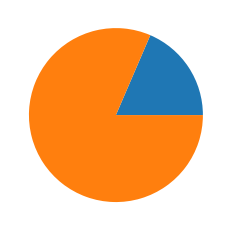

In [20]:
#Pie Chart showing the proportion of HR Sanctions out of all the sanctions.
distribution= np.array([HR_Sanct, Tot_Sanct-HR_Sanct])
plt.pie(distribution)
plt.show()

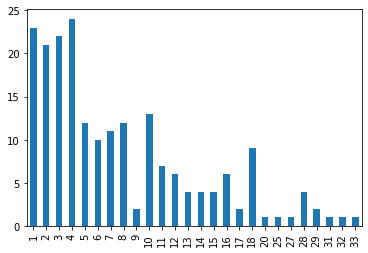

In [21]:
#Show the frequency of the time that sanctions are active
gsdb['time'].value_counts().sort_index().plot(kind="bar")
plt.show()

In [22]:
#Review the unique Target States
countries=gsdb["sanctioned_state"].unique()
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Belarus'
 'Bulgaria' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chile' 'China' 'Congo, Democratic Republic of the' "Cote d'Ivoire"
 'El Salvador' 'Equatorial Guinea' 'Ethiopia (excludes Eritrea)' 'Fiji'
 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Indonesia' 'Iran' 'Kenya'
 'Korea, North' 'Latvia' 'Liberia' 'Mauritania' 'Myanmar' 'Nepal'
 'Nigeria' 'Norway' 'Pakistan' 'Paraguay' 'Peru' 'Poland' 'Romania'
 'Rwanda' 'Sierra Leone' 'Somalia' 'South Africa' 'South Vietnam'
 'Soviet Union' 'Sudan' 'Suriname' 'Thailand' 'Togo' 'Turkey'
 'Turkmenistan' 'Uganda' 'Uruguay' 'Uzbekistan' 'Yugoslavia' 'Zimbabwe']


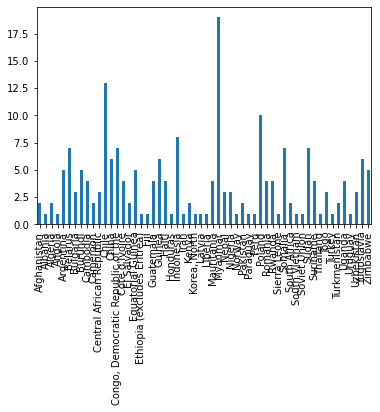

In [23]:
#Determine the distribution of the target States.
gsdb['sanctioned_state'].value_counts().sort_index().plot(kind="bar")
plt.show()

In [24]:
#AN OVERVIEW OF THE HUMAN RIGHTS DATASET

In [25]:
hum_rights_unclean.head(21)

,CTRY,YEAR,CIRI,COW,POLITY,UNCTRY,UNREG,UNSUBREG,PHYSINT,DISAP,...,SPEECH,ELECSD,OLD_RELFRE,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD,SANCTION
0,Afghanistan,1981,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,Afghanistan,1982,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3
2,Afghanistan,1983,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,Afghanistan,1984,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
4,Afghanistan,1985,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,N
5,Afghanistan,1986,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,N
6,Afghanistan,1987,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,N
7,Afghanistan,1988,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,N
8,Afghanistan,1989,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,N
9,Afghanistan,1990,101,700.0,700.0,4.0,142,62,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,N


In [26]:
hum_rights_unclean.describe()

,YEAR,CIRI,COW,POLITY,UNCTRY,UNREG,UNSUBREG,PHYSINT,DISAP,KILL,...,OLD_MOVE,SPEECH,ELECSD,OLD_RELFRE,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
count,6262.000000,6262.000000,6169.000000,6231.000000,6138.000000,6262.000000,6262.000000,4915.000000,5045.000000,5043.000000,...,4082.000000,5043.000000,5043.000000,4074.000000,5640.000000,5043.000000,5042.000000,5042.000000,3882.000000,5689.000000
mean,1996.000000,402.470297,470.002269,468.297545,441.343434,141.351485,58.277228,4.911699,-2.542517,-3.276621,...,-0.924057,-0.430299,-0.301804,-1.234413,-0.460993,-0.701170,-13.789964,-3.421063,-36.305255,-14.047284
std,8.944986,174.898203,261.143888,259.919924,259.329244,138.432781,54.944610,2.337415,53.576885,57.117319,...,10.927872,10.253919,10.279558,19.116074,25.004052,17.397793,116.517100,62.106724,185.886488,117.311057
min,1981.000000,101.000000,2.000000,2.000000,4.000000,2.000000,5.000000,0.000000,-999.000000,-999.000000,...,-77.000000,-77.000000,-77.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1988.000000,251.000000,305.000000,310.000000,212.000000,2.000000,14.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1996.000000,402.500000,451.000000,450.000000,436.000000,142.000000,35.000000,5.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,2004.000000,554.000000,680.000000,679.000000,674.000000,150.000000,62.000000,7.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,2011.000000,700.000000,990.000000,990.000000,894.000000,419.000000,155.000000,8.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000


In [27]:
#Unnecessary columns: CIRI, COW, POLITY, UNCTRY, UNREG, UNSUBREG, as these are identifiers
#Remove OLD columns as they are variable calculated in an older way and are outdated. 
hum_rights_unclean.pop("CIRI")
hum_rights_unclean.pop("COW")
hum_rights_unclean.pop("POLITY")
hum_rights_unclean.pop("UNCTRY")
hum_rights_unclean.pop("UNREG")
hum_rights_unclean.pop("UNSUBREG")
hum_rights_unclean.pop("OLD_EMPINX")
hum_rights_unclean.pop("OLD_MOVE")
hum_rights_unclean.pop("OLD_RELFRE")

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
6257    NaN
6258    NaN
6259    NaN
6260    NaN
6261    NaN
Name: OLD_RELFRE, Length: 6262, dtype: float64

In [28]:
#Confirm the removal of the columns
hum_rights_unclean.head(5)

,CTRY,YEAR,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD,SANCTION
0,Afghanistan,1981,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,Afghanistan,1982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
2,Afghanistan,1983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,Afghanistan,1984,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5
4,Afghanistan,1985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,N


In [29]:
hum_rights_unclean.describe()

,YEAR,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
count,6262.000000,4915.000000,5045.000000,5043.000000,5043.000000,5043.000000,4933.000000,5043.000000,5738.000000,5737.000000,5043.000000,5043.000000,5640.000000,5043.000000,5042.000000,5042.000000,3882.000000,5689.000000
mean,1996.000000,4.911699,-2.542517,-3.276621,-1.884196,-2.614713,8.279140,-0.581598,-14.809516,-14.750218,-0.430299,-0.301804,-0.460993,-0.701170,-13.789964,-3.421063,-36.305255,-14.047284
std,8.944986,2.337415,53.576885,57.117319,41.057656,45.579913,4.233901,17.550998,121.794129,121.817254,10.253919,10.279558,25.004052,17.397793,116.517100,62.106724,185.886488,117.311057
min,1981.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-77.000000,-77.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1988.000000,3.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1996.000000,5.000000,2.000000,1.000000,1.000000,1.000000,9.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,2004.000000,7.000000,2.000000,2.000000,2.000000,1.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,2011.000000,8.000000,2.000000,2.000000,2.000000,2.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000


In [30]:
#According to the data description, any unknown data is listed as -999, any data during periods of interregnum or interruption
#are listed at -77 or -66. Therefore, any data below ZERO cannot be relied upon. Changing such numbers to ZERO would imply that
#there are serious violations, which could be misleading. Therefore, it would be best to remove such data and not include it 
#in most of the analysis
hum_rights=hum_rights_unclean

In [31]:
cols=["PHYSINT","DISAP","KILL","POLPRIS","TORT","NEW_EMPINX","ASSN","FORMOV","DOMMOV","SPEECH","ELECSD","NEW_RELFRE","WORKER","WECON","WOPOL","WOSOC","INJUD"]

hum_rights[cols] = hum_rights[cols].mask(np.isclose(hum_rights[cols].values, -999.000000))
hum_rights[cols] = hum_rights[cols].mask(np.isclose(hum_rights[cols].values, -77.000000))
hum_rights[cols] = hum_rights[cols].mask(np.isclose(hum_rights[cols].values, -66.000000))


In [32]:
hum_rights.describe()

,YEAR,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
count,6262.000000,4915.000000,4935.000000,4931.000000,4939.000000,4937.000000,4933.000000,4942.000000,5557.000000,5555.000000,4947.000000,4947.000000,5542.000000,4946.000000,4877.00000,4927.000000,3653.000000,5510.000000
mean,1996.000000,4.911699,1.668085,1.324883,1.126341,0.785295,8.279140,1.102185,1.427569,1.505851,0.991106,1.122094,1.335980,0.917105,1.32766,1.787092,1.244457,1.159165
std,8.944986,2.337415,0.638947,0.762394,0.844198,0.747011,4.233901,0.846842,0.733113,0.733793,0.730261,0.834973,0.807205,0.763157,0.69694,0.646936,0.849699,0.787842
min,1981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1988.000000,3.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,2.000000,1.000000,1.000000
50%,1996.000000,5.000000,2.000000,2.000000,1.000000,1.000000,9.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.00000,2.000000,1.000000,1.000000
75%,2004.000000,7.000000,2.000000,2.000000,2.000000,1.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
max,2011.000000,8.000000,2.000000,2.000000,2.000000,2.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,3.000000,3.000000,2.000000


In [33]:
#Not every country in the human rights database has been subject to sanctions. We will remove those unsanctioned countries 
countries_inc=gsdb["sanctioned_state"]
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Belarus'
 'Bulgaria' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chile' 'China' 'Congo, Democratic Republic of the' "Cote d'Ivoire"
 'El Salvador' 'Equatorial Guinea' 'Ethiopia (excludes Eritrea)' 'Fiji'
 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Indonesia' 'Iran' 'Kenya'
 'Korea, North' 'Latvia' 'Liberia' 'Mauritania' 'Myanmar' 'Nepal'
 'Nigeria' 'Norway' 'Pakistan' 'Paraguay' 'Peru' 'Poland' 'Romania'
 'Rwanda' 'Sierra Leone' 'Somalia' 'South Africa' 'South Vietnam'
 'Soviet Union' 'Sudan' 'Suriname' 'Thailand' 'Togo' 'Turkey'
 'Turkmenistan' 'Uganda' 'Uruguay' 'Uzbekistan' 'Yugoslavia' 'Zimbabwe']


In [34]:
countries_HR=hum_rights["CTRY"].unique()
sanct_countries=set(countries_HR).difference(countries_inc)
SC=list(sanct_countries)
hum_rights=hum_rights[~hum_rights['CTRY'].str.contains('|'.join(SC))]

In [35]:
 #Confirm that the rows have been removed.
hum_rights.describe()

,YEAR,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
count,1550.000000,1367.000000,1373.000000,1370.000000,1374.000000,1375.000000,1374.000000,1375.000000,1427.000000,1426.000000,1375.000000,1375.000000,1426.000000,1374.000000,1337.000000,1368.000000,1047.000000,1417.000000
mean,1996.000000,3.814923,1.516387,0.992701,0.833333,0.467636,6.822416,0.816000,1.253679,1.260168,0.800727,0.869091,1.143759,0.679039,1.079282,1.789474,0.986628,0.789697
std,8.947159,2.186438,0.716772,0.775787,0.808203,0.623596,3.924141,0.794105,0.741558,0.822695,0.673581,0.792264,0.854104,0.689879,0.574923,0.624639,0.624402,0.715708
min,1981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1988.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1996.000000,4.000000,2.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,2004.000000,5.000000,2.000000,2.000000,2.000000,1.000000,10.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,2011.000000,8.000000,2.000000,2.000000,2.000000,2.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000


In [36]:
#Normalize the data

cols= ["PHYSINT","DISAP","KILL","POLPRIS","TORT","NEW_EMPINX","ASSN","FORMOV","DOMMOV","SPEECH","ELECSD","NEW_RELFRE","WORKER","WECON","WOPOL","WOSOC","INJUD"]

hum_rights[cols]=(hum_rights[cols]-hum_rights[cols].min())/(hum_rights[cols].max()-hum_rights[cols].min())


In [37]:
hum_rights.head()

,CTRY,YEAR,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD,SANCTION
0,Afghanistan,1981,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,2
1,Afghanistan,1982,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.333333,0.0,0.0,3
2,Afghanistan,1983,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,4
3,Afghanistan,1984,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.333333,0.0,0.0,5
4,Afghanistan,1985,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,N


In [38]:
hum_rights=hum_rights.round(3)

In [39]:
hum_rights.describe()

,YEAR,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,DOMMOV,SPEECH,ELECSD,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD
count,1550.000000,1367.000000,1373.000000,1370.000000,1374.000000,1375.000000,1374.000000,1375.000000,1427.000000,1426.000000,1375.000000,1375.000000,1426.000000,1374.00000,1337.000000,1368.000000,1047.000000,1417.000000
mean,1996.000000,0.476865,0.758194,0.496350,0.416667,0.233818,0.487335,0.408000,0.626840,0.630084,0.400364,0.434545,0.571879,0.33952,0.359594,0.596641,0.328711,0.394848
std,8.947159,0.273305,0.358386,0.387894,0.404102,0.311798,0.280358,0.397052,0.370779,0.411347,0.336790,0.396132,0.427052,0.34494,0.191772,0.208381,0.208211,0.357854
min,1981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1988.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.286000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.00000,0.333000,0.333000,0.333000,0.000000
50%,1996.000000,0.500000,1.000000,0.500000,0.500000,0.000000,0.429000,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,0.50000,0.333000,0.667000,0.333000,0.500000
75%,2004.000000,0.625000,1.000000,1.000000,1.000000,0.500000,0.714000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,0.50000,0.333000,0.667000,0.333000,0.500000
max,2011.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [40]:
#The closer the scores to ZERO, the worse the state of Human Rights. The scores added across the different types of 
#violations can range from 0 to 34. 
#A column is created to provide a summary number 0 TOT_VIOLATIONS
cols=["PHYSINT","DISAP", "KILL", "POLPRIS", "TORT", "NEW_EMPINX", "ASSN", "FORMOV", "DOMMOV", "SPEECH", "ELECSD", "NEW_RELFRE", "WORKER", "WECON", "WOPOL", "WOSOC", "INJUD"]
hum_rights["TOT_VIOLATIONS"] = hum_rights[cols].sum(axis=1)

In [41]:
#Calculate the change in violation score
hum_rights["PREVIOUS"]=hum_rights["TOT_VIOLATIONS"].shift(1)
hum_rights["CHANGE"]=hum_rights["TOT_VIOLATIONS"]-hum_rights["PREVIOUS"]
hum_rights["CHANGE"]=hum_rights["CHANGE"].round(3)

In [42]:
hum_rights.head()

,CTRY,YEAR,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,...,NEW_RELFRE,WORKER,WECON,WOPOL,WOSOC,INJUD,SANCTION,TOT_VIOLATIONS,PREVIOUS,CHANGE
0,Afghanistan,1981,0.0,0.0,0.0,0.0,0.0,0.143,0.0,0.0,...,0.5,0.0,0.0,0.000,0.0,0.0,2,1.143,NaN,NaN
1,Afghanistan,1982,0.0,0.0,0.0,0.0,0.0,0.071,0.0,0.0,...,0.5,0.0,0.0,0.333,0.0,0.0,3,0.904,1.143,-0.239
2,Afghanistan,1983,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.333,0.0,0.0,4,0.333,0.904,-0.571
3,Afghanistan,1984,0.0,0.0,0.0,0.0,0.0,0.071,0.0,0.0,...,0.0,0.0,0.0,0.333,0.0,0.0,5,0.904,0.333,0.571
4,Afghanistan,1985,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.333,0.0,0.0,N,0.333,0.904,-0.571


In [43]:
#In order to be able to see when one country's data ends and another begins, we make a column that states the previous
#country so that when they are not the same, we know there is a shift in country.
hum_rights["prev_ctry"]=hum_rights["CTRY"].shift(1)
hum_rights["pcs"]= np.where(hum_rights["CTRY"]==hum_rights["prev_ctry"], "0", "1")

In [44]:
#ANALYSIS OF WHETHER THE CHANGE IS STATISTICALLY SIGNIFICANT TO THE SANCTION STATUS
#null hypothesis: The presence of a sanction does not decrease the total violation score
### If there is a "Y", growth is not less than 0.

#####The mean of growth is zero where sanctions is Y


#null hypothesis: In the first year after a sanction, there is no increase in the total violation score
#null hypothesis: In the second year after a sanction, there is no imcrease in the total violation score
#null hypothesis: In the third year after a sanction, there is no increase in the total violation score
#null hypothesis: In the fourth year after a sanction, there is no increase in the total violation score
#null hypothesis: In the fifth year after a sanction, there is no increase in the total violation score

In [45]:
no_sanct=hum_rights[hum_rights["SANCTION"]=="N"]
under_sanct=hum_rights[hum_rights["SANCTION"]=="Y"]
year1=hum_rights[hum_rights["SANCTION"]=="1"]
year2=hum_rights[hum_rights["SANCTION"]=="2"]
year3=hum_rights[hum_rights["SANCTION"]=="3"]
year4=hum_rights[hum_rights["SANCTION"]=="4"]
year5=hum_rights[hum_rights["SANCTION"]=="5"]

In [46]:
num_no_sanct=len(no_sanct)
num_sanct=len(under_sanct)
num_year1=len(year1)
num_year2=len(year2)
num_year3=len(year3)
num_year4=len(year4)
num_year5=len(year5)

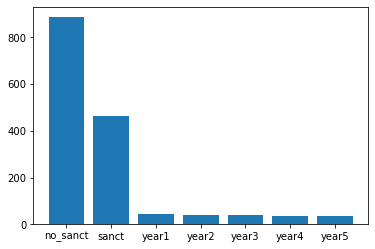

In [47]:
#the instances of sanctions, no sanctions and years after sanctions
instances=[num_no_sanct, num_sanct, num_year1, num_year2, num_year3, num_year4, num_year5]
x_inst=("no_sanct", "sanct", "year1", "year2", "year3", "year4", "year5")
x_position=np.arange(len(x_inst))
plt.bar(x_position, instances)
plt.xticks(x_position, x_inst)
plt.show()

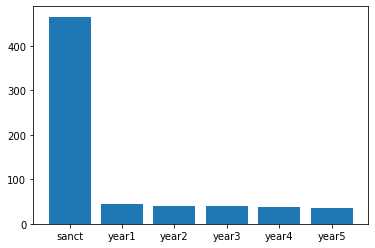

In [48]:
#Remove no sanctionsto see the more important distributions
instances=[num_sanct, num_year1, num_year2, num_year3, num_year4, num_year5]
x_inst=("sanct", "year1", "year2", "year3", "year4", "year5")
x_position=np.arange(len(x_inst))
plt.bar(x_position, instances)
plt.xticks(x_position, x_inst)
plt.show()

In [49]:
no_sanct_mean=no_sanct["CHANGE"].mean()
under_sanct_mean=under_sanct["CHANGE"].mean()
year1_mean=year1["CHANGE"].mean()
year2_mean=year2["CHANGE"].mean()
year3_mean=year3["CHANGE"].mean()
year4_mean=year4["CHANGE"].mean()
year5_mean=year5["CHANGE"].mean()

In [50]:
means=[no_sanct_mean, under_sanct_mean, year1_mean, year2_mean, year3_mean, year4_mean, year5_mean]

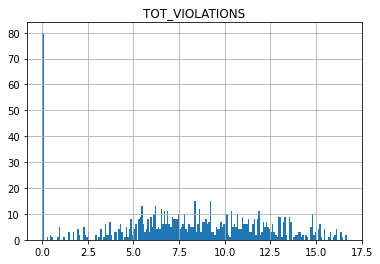

In [51]:
#T-TESTS
#First, we plot the distributions of the rate of change for each time
no_sanct.hist(column="TOT_VIOLATIONS", bins=200)
plt.show()

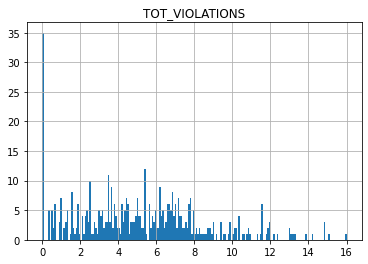

In [52]:
under_sanct.hist(column="TOT_VIOLATIONS", bins=200)
plt.show()

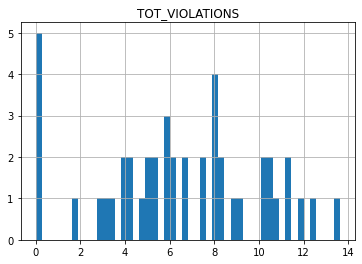

In [53]:
year1.hist(column="TOT_VIOLATIONS", bins=50)
plt.show()

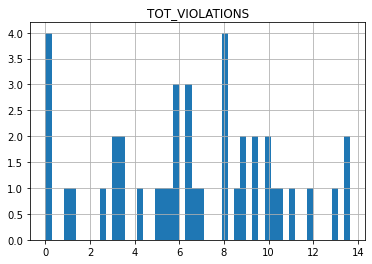

In [54]:
year2.hist(column="TOT_VIOLATIONS", bins=50)
plt.show()

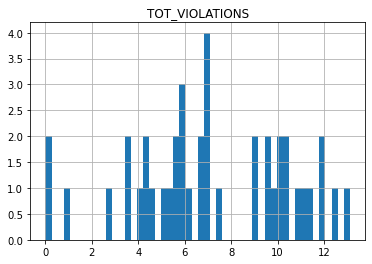

In [55]:
year3.hist(column="TOT_VIOLATIONS", bins=50)
plt.show()

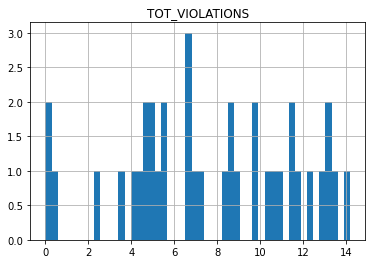

In [56]:
year4.hist(column="TOT_VIOLATIONS", bins=50)
plt.show()

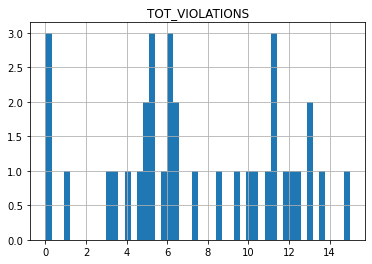

In [57]:
year5.hist(column="TOT_VIOLATIONS", bins=50)
plt.show()

In [58]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'N'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'Y'])


Ttest_indResult(statistic=13.052889236810675, pvalue=9.309834472149256e-37)

In [59]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'N'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '1'])

Ttest_indResult(statistic=2.5136526280568434, pvalue=0.012116968582557744)

In [60]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'N'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '2'])

Ttest_indResult(statistic=2.231726879925896, pvalue=0.025871883755586585)

In [61]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'N'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '3'])

Ttest_indResult(statistic=1.3631436568357604, pvalue=0.1731689469284736)

In [62]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'N'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '4'])

Ttest_indResult(statistic=0.5305778652012639, pvalue=0.5958392427791034)

In [63]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'N'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '5'])

Ttest_indResult(statistic=0.8574897512944958, pvalue=0.39139783644092374)

In [64]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'Y'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '1'])

Ttest_indResult(statistic=-2.5215772896131448, pvalue=0.011987755746250056)

In [65]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'Y'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '2'])

Ttest_indResult(statistic=-2.6021833441338225, pvalue=0.009535837193164913)

In [66]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'Y'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '3'])

Ttest_indResult(statistic=-3.687255326233225, pvalue=0.00025129837335314414)

In [67]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'Y'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '4'])

Ttest_indResult(statistic=-4.381988972184844, pvalue=1.4338800307122164e-05)

In [68]:
stats.ttest_ind(hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == 'Y'],
                hum_rights['TOT_VIOLATIONS'][hum_rights['SANCTION'] == '5'])

Ttest_indResult(statistic=-3.840173478856038, pvalue=0.0001388078774334379)

In [69]:
hum_rights.head()

,CTRY,YEAR,PHYSINT,DISAP,KILL,POLPRIS,TORT,NEW_EMPINX,ASSN,FORMOV,...,WECON,WOPOL,WOSOC,INJUD,SANCTION,TOT_VIOLATIONS,PREVIOUS,CHANGE,prev_ctry,pcs
0,Afghanistan,1981,0.0,0.0,0.0,0.0,0.0,0.143,0.0,0.0,...,0.0,0.000,0.0,0.0,2,1.143,NaN,NaN,NaN,1
1,Afghanistan,1982,0.0,0.0,0.0,0.0,0.0,0.071,0.0,0.0,...,0.0,0.333,0.0,0.0,3,0.904,1.143,-0.239,Afghanistan,0
2,Afghanistan,1983,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.333,0.0,0.0,4,0.333,0.904,-0.571,Afghanistan,0
3,Afghanistan,1984,0.0,0.0,0.0,0.0,0.0,0.071,0.0,0.0,...,0.0,0.333,0.0,0.0,5,0.904,0.333,0.571,Afghanistan,0
4,Afghanistan,1985,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.333,0.0,0.0,N,0.333,0.904,-0.571,Afghanistan,0


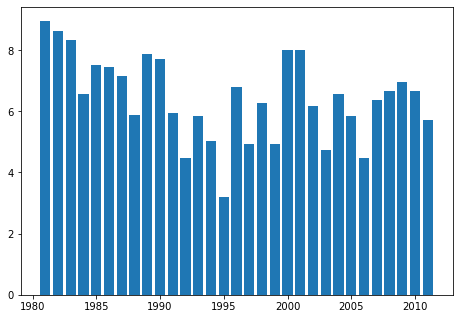

In [70]:
#Example Country Violations (Algeria)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algeria=hum_rights[hum_rights["CTRY"]=="Algeria"]
years=algeria["YEAR"]
score=algeria["TOT_VIOLATIONS"]

ax.bar(years,score)
plt.show()

In [71]:
#change NaN's to a string because of issues in analysis when there is an NaN present. Also, reset the index as it is making
#for loops difficult.
hum_rights["prev_ctry"]=hum_rights["prev_ctry"].fillna("no")
hum_rights.reset_index(drop=True, inplace=True)

In [72]:
#Determine the initial violation score
#country=list(hum_rights["CTRY"])
#prev_ctry=list(hum_rights["prev_ctry"])
#tot_viols=list(hum_rights["TOT_VIOLATIONS"])
#init_score=[]

#for i in range(len(hum_rights["CTRY"])):
 #   if country[i] != prev_ctry[i]:
  #      x=tot_viols[i]
   #     init_score.append(x)
    #    i=i+1
    #else:
     #   init_score.append(x)
      #  i=i+1

In [73]:
#hum_rights["prev_sanct"]=hum_rights["SANCTION"].shift(1)

In [74]:
#sanction=list(hum_rights["SANCTION"])
#prev_sanct=list(hum_rights["prev_sanct"])
#tot_viols2=list(hum_rights["TOT_VIOLATIONS"])
#init_score2=[]

#for i in range(len(hum_rights["SANCTION"])):
 #   if sanction[i] != prev_sanct[i]:
  #      x=tot_viols[i]
   #     init_score2.append(x)
    #    i=i+1
    #else:
     #   init_score2.append(x)
      #  i=i+1

In [75]:
#hum_rights["Init_score"]=init_score

In [76]:
#hum_rights["change_from_init"]=hum_rights["TOT_VIOLATIONS"]-hum_rights["Init_score"]

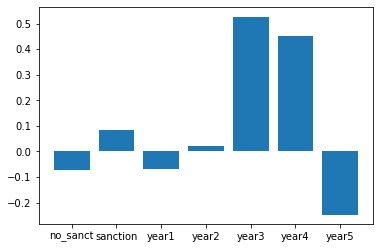

In [77]:
#Year to year change in violations - the higher the number, the fewer the violations
x_axis=("no_sanct", "sanction", "year1", "year2", "year3", "year4", "year5")
x_pos=np.arange(len(x_axis))
plt.bar(x_pos, means)
plt.xticks(x_pos, x_axis)
plt.show()

In [78]:
#hum_rights.to_excel("C:\\Users\\carol\\Desktop\\School\\Ryerson\\Final Project CIND 820\\output2.xlsx") 

In [99]:
#Created a new dataset with the information derived from the previous data set - still need to impute Quality of Life index.
#Will also try to create the dataset using code as opposed to by hand.
sanctions=pd.read_csv("C:\\Users\\carol\\Desktop\\School\\Ryerson\\Final Project CIND 820\\datasets\\Sanctions.csv")

#Will also impute Sanctioning States

In [104]:
sanctions.describe()

,Year_Start,Year_End,Years,Sanctioning_State,Before_Sanct,Before_Sanct_avg,Start_of_Sanct,End_of_Sanct,During_avg,Year1,Year2,Year3,Year4,Year5,Average,Success
count,52.000000,49.000000,41.000000,0.0,50.000000,51.000000,54.000000,51.000000,59.000000,48.000000,42.000000,40.000000,36.000000,34.000000,48.000000,42.000000
mean,1995.865385,1998.551020,6.439024,NaN,5.573985,6.027564,4.939185,6.668020,5.593529,6.645646,6.909905,7.543975,8.083083,8.013029,7.013060,0.452381
std,8.104777,8.539275,4.801296,NaN,3.347113,3.419215,3.380363,3.749357,3.200622,3.570204,3.811681,3.246844,3.940477,4.055527,3.433394,0.503761
min,1977.000000,1981.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,1992.000000,2.000000,NaN,3.514750,3.829300,3.011750,4.160500,3.261572,4.260000,4.508750,5.591750,5.068500,5.385500,5.093650,0.000000
50%,1994.000000,2000.000000,4.000000,NaN,5.619500,5.934818,4.830500,6.327000,5.632000,6.601000,6.726000,6.955500,8.580500,7.952000,6.598100,0.000000
75%,2003.000000,2005.000000,10.000000,NaN,7.847500,7.959146,6.610750,8.357000,7.202866,9.103750,9.856250,10.137750,11.158000,11.294500,9.825750,1.000000
max,2010.000000,2019.000000,18.000000,NaN,15.429000,15.755620,16.001000,14.857000,14.857000,13.637000,13.637000,13.108000,14.180000,14.999000,13.255000,1.000000


In [102]:
sanctions_clean=sanctions.dropna(how="any", subset=["Success"])

In [105]:
sanctions_clean.describe()

,Year_Start,Year_End,Years,Sanctioning_State,Before_Sanct,Before_Sanct_avg,Start_of_Sanct,End_of_Sanct,During_avg,Year1,Year2,Year3,Year4,Year5,Average,Success
count,40.000000,42.000000,40.000000,0.0,39.000000,39.000000,41.000000,42.000000,42.000000,42.000000,36.000000,34.00000,31.000000,29.000000,42.000000,42.000000
mean,1995.000000,2000.095238,6.150000,NaN,5.508032,5.852683,4.887439,6.676738,5.795870,6.393952,6.644917,7.31650,7.793871,7.930552,6.749367,0.452381
std,7.772404,6.495062,4.486733,NaN,3.234480,3.000723,3.265575,3.706363,3.113851,3.703433,3.968503,3.32742,3.930059,3.777138,3.461252,0.503761
min,1977.000000,1988.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,1994.000000,2.000000,NaN,3.529500,3.960300,3.047000,4.154750,3.571500,4.068000,3.500000,5.12375,4.827500,5.381000,4.277650,0.000000
50%,1993.500000,2001.000000,4.000000,NaN,5.685000,5.766556,4.721000,6.288500,5.840318,6.095500,6.413000,6.90200,8.518000,7.369000,6.384250,0.000000
75%,2001.250000,2005.750000,10.000000,NaN,8.148500,7.907300,6.529000,8.553500,7.607714,8.748500,9.613000,10.31925,10.946500,11.287000,9.613450,1.000000
max,2009.000000,2010.000000,16.000000,NaN,11.887000,11.951460,16.001000,14.805000,13.232000,13.637000,13.637000,12.44000,13.399000,13.733000,13.255000,1.000000


In [110]:
#CROSS VALIDATION

#Need to fill in the missing data first
cols=["Years", "Before_Sanct", "Before_Sanct_avg", "Start_of_Sanct", "End_of_Sanct", "Year1","Year2","Year3","Year4","Year5"]
X=sanctions[cols]
Y=sanctions["Success"]
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [nan nan nan nan nan]
Average Cross Validation score :nan


C:\Users\carol\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carol\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\carol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1344, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\carol\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\carol\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\carol\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, acc

AttributeError: 'Series' object has no attribute 'data'

In [89]:
scores = cross_val_score(model, sanctions, sanctions[Year1], cv=6)
print “Cross-validated scores:”, scores

NameError: name 'X_train' is not defined

In [82]:
number=[]
sanctions=hum_rights["SANCTION"]
previous=hum_rights["prev_sanct"]

for i in range(len(hum_rights["SANCTION"])):
    if (sanctions[i]=="N") & (previous[i]!="N"):
        x=i
        number.append(x)
        i=i+1
print(len(number))

KeyError: 'prev_sanct'

In [ ]:
print(number)

In [ ]:
score=hum_rights["TOT_VIOLATIONS"]
avg_init_score=[]
m=0
nums=[]

for i in range(len(number)):
    p=number[i]+m
    if (sanctions[p]=="N"):
        nums.append(score[p])
        m=m+1
    else:
        avg=statistics.mean(nums)
        avg_init_score.append(avg)
        i=i+1
        m=0
        

In [ ]:
print(avg_init_score)

In [ ]:
#sanctioned=[]
#unsanct_score=[]
#score=hum_rights["TOT_VIOLATIONS"]
#country=hum_rights["CTRY"]
#pre_country=hum_rights["prev_ctry"]

#for i in range(len(number)):
 #   x=number[i]
  #  N=[]
   # sanctioned.append(hum_rights[CTRY[x]])
    #if (country[x]==prev_ctry[x]) & (sanctions[i]=="N"):
     #   N.append(score[i])
    #avg_mean=mean(N)
    #unsanct_score.append(avg_mean)
    

In [ ]:
print(colored(255, 0, 0, "AN OVERVIEW OF THE PHYSICAL QUALITY OF LIFE INDEX"))

In [ ]:
print(QOLI.head(5))

In [ ]:
QOLI.describe()

In [ ]:
#What is the significant (p value) of the relationship between no sanction and sanction or years?
#Is there a correlation between the country which sanctions and the efficacy? (i.e the rate of change during or after the sanctions)
#Is there a correlation between the length of sanctions and the long term effect?
#Regression? train a model based on sanctioning country, length of sanction, quality of life index, initial violation score... use that as predictive.